<a href="https://colab.research.google.com/github/khavya04/deep-learning/blob/main/dl_lab_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
fashion_mnist=keras.datasets.fashion_mnist

from functools import partial
from tensorflow import keras
DefaultConv2D=partial(keras.layers.Conv2D,kernel_size=3,activation="relu",padding="SAME")
model=keras.models.Sequential([
    DefaultConv2D(filters=64,kernel_size=7,input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10,activation="softmax")
])
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_names[y_train[0]]
x_new=x_test[:3]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from typing import ByteString
def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=10, default=2)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
  optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
  if optimizer == "sgd":
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model
  from re import X
  random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_fashion_mnsit",
    project_name="my_rnd_search",
    seed = 42
)
  random_search_tuner.search(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
  top3models = random_search_tuner.get_best_models(num_models =3)
  best_model = top3models[0]
  top3_params = random_search_tuner.get_best_hyperparameters(num_trials =3)
  best_params = top3_params[0]
  best_trail = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
  best_trail.summary()
  best_trail.metrics.get_last_value("val_accuracy")
  best_model.fit(x_train, y_train, epochs=10)
  test_loss, test_acc = best_model.evaluate(x_test, y_test)
  print(f"Test accuracy: {test_acc:.3f}")
  best_model.summary()

In [ ]:
  from re import X
  random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_fashion_mnsit",
    project_name="my_rnd_search",
    seed = 42
)
  random_search_tuner.search(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
  top3models = random_search_tuner.get_best_models(num_models =3)
  best_model = top3models[0]
  top3_params = random_search_tuner.get_best_hyperparameters(num_trials =3)
  best_params = top3_params[0]
  best_trail = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
  best_trail.summary()
  best_trail.metrics.get_last_value("val_accuracy")
  best_model.fit(x_train, y_train, epochs=10)
  test_loss, test_acc = best_model.evaluate(x_test, y_test)
  print(f"Test accuracy: {test_acc:.3f}")
  best_model.summary()

Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.36500000953674316

Best val_accuracy So Far: 0.8539999723434448
Total elapsed time: 00h 02m 58s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Trial 3 summary
Hyperparameters:
n_hidden: 10
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8539999723434448
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8487 - loss: 0.4207
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8553 - loss: 0.4002
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8582 - loss: 0.3852
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8644 - loss: 0.3689
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8704 - loss: 0.3594
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3533
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8738 - loss: 0.3504
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8764 - loss: 0.3390
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8807 - loss: 0.3315
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.87

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 37)                  │          29,045 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             380 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,081 (164.38 KB)

 Trainable params: 42,079 (164.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [1]:
!pip install torch torchvision

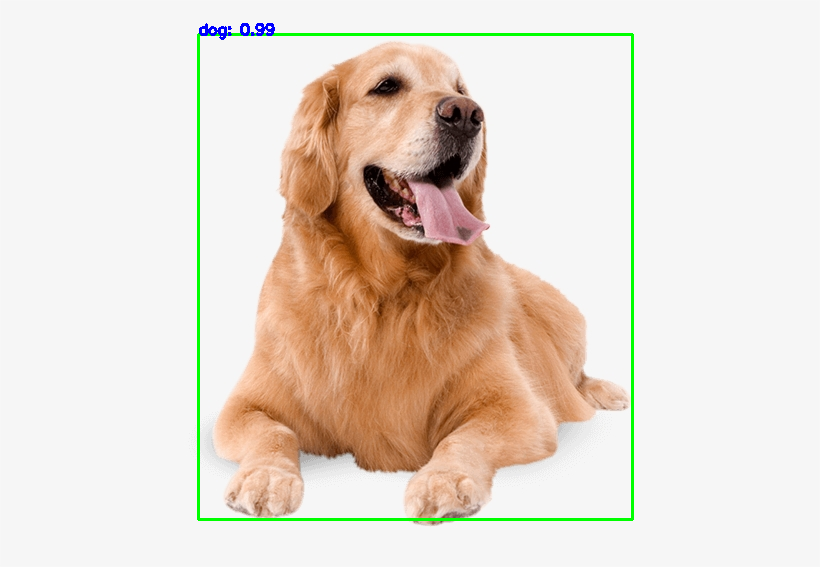

In [11]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat','dog', 'dog', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, confidence_threshold=0.5):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    # Convert the image from BGR to RGB (since OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize the image tensor (same normalization as the pre-trained model)
    image_tensor = F.to_tensor(image_rgb)
    image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension

    # Perform inference
    with torch.no_grad():
        predictions = model(image_tensor)

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    original_image = image.copy()

    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return original_image

if __name__ == "__main__":
    IMAGE_PATH = "/content/dlex6.png"  # Replace with your image path
    detected_image = detect_objects(IMAGE_PATH)

    # Display the output
    if detected_image is not None:
        cv2_imshow(detected_image)


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Reshape for CNN input and normalize
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0    # Reshape for CNN input and normalize
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the model using CNN layers
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Another Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Another MaxPooling layer
    Flatten(),  # Flatten the 2D matrix into a 1D vector
    Dense(128, activation='relu'),  # Dense layer for classification
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')  # Output layer for classification (10 classes)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Function to preprocess the input image
def preprocess_image(image_path):
    img = load_img(image_path, color_mode="grayscale", target_size=(28, 28))
    img_array = img_to_array(img)
    img_array = img_array.reshape(-1, 28, 28, 1) / 255.0  # Reshape and normalize the image
    return img_array

# Preprocess the input image for prediction
image_path = "/content/1.jpg"
input_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_label = np.argmax(predictions)

print(f"Predicted label for the input image: {predicted_label}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.8502 - loss: 0.4693 - val_accuracy: 0.9815 - val_loss: 0.0614
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.9727 - loss: 0.0865 - val_accuracy: 0.9872 - val_loss: 0.0427
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.9809 - loss: 0.0647 - val_accuracy: 0.9885 - val_loss: 0.0418
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9832 - loss: 0.0540 - val_accuracy: 0.9898 - val_loss: 0.0401
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 38ms/step - accuracy: 0.9870 - loss: 0.0414 - val_accuracy: 0.9893 - val_loss: 0.0363
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.9885 - loss: 0.0377 - val_accuracy: 0.9906 - val_loss: 0.0337
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 33ms/step - accuracy: 0.9904 - loss: 0.0297 - val_accuracy: 0.9906 - val_loss: 0.0362
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 37ms/step - accuracy: 0.9912 -

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
num_notes = 50
sequence_length = 30
num_sequences = 1000
np.random.seed(0)
data = np.random.randint(0,num_notes, size=(num_sequences, sequence_length))
x_train = data[:, :-1]
y_train = data[:, 1:]
x_train = to_categorical(x_train, num_classes=num_notes)
y_train = to_categorical(y_train, num_classes=num_notes)
model = models.Sequential()
model.add(layers.LSTM(128, input_shape=(sequence_length - 1, num_notes), return_sequences=True))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.time_distributed(layers.Dense(num_notes, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')